# Importamos dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('/dataset_agricultura.csv')

In [4]:
df.head()

,ID,Cantidad_estimada_insectos,Cultivo_Tipo,Suelo_Tipo,Pesticide_Use_Categoria,Numero_Dosis_Semana,Numero_Semanas_Usado,Numero_Semanas_Dejado,Estacion,Cultivo_Daño,Cultivo_Tipo_Daño_lag1,Suelo_Tipo_Daño_lag1,Pesticide_Use_Categoria_lag1,Estacion_lag1,Cultivo_Tipo_Daño_lag2,Suelo_Tipo_Daño_lag2,Pesticide_Use_Categoria_lag2,Estacion_lag2,Cultivo_Daño_lag1,Cantidad_estimada_insectos_lag1,Cultivo_Tipo_lag1,Suelo_Tipo_lag1,Numero_Dosis_Semana_lag1,Numero_Semanas_Usado_lag1,Numero_Semanas_Dejado_lag1,Cultivo_Daño_lag2,Cantidad_estimada_insectos_lag2,Cultivo_Tipo_lag2,Suelo_Tipo_lag2,Numero_Dosis_Semana_lag2,Numero_Semanas_Usado_lag2,Numero_Semanas_Dejado_lag2
0,F00000001,188,1,0,1,0,0.0,0,1,0,-999.000000,-999.000000,-999,-999,-999.000000,-999.0,-999,-999,-999,-999,-999,-999,-999,-999.0,-999,-999,-999,-999,-999,-999,-999.0,-999
1,F00000003,209,1,0,1,0,0.0,0,2,1,0.000000,0.000000,1,1,-999.000000,-999.0,-999,-999,0,188,1,0,0,0.0,0,-999,-999,1,0,-999,-999.0,-999
2,F00000004,257,1,0,1,0,0.0,0,2,1,0.500000,0.500000,1,2,0.000000,0.0,1,1,1,209,1,0,0,0.0,0,0,188,1,0,0,0.0,0
3,F00000005,257,1,1,1,0,0.0,0,2,1,0.666667,-999.000000,1,2,0.500000,-999.0,1,2,1,257,1,0,0,0.0,0,1,209,1,0,0,0.0,0
4,F00000006,342,1,0,1,0,0.0,0,2,1,0.750000,0.666667,1,2,0.666667,0.5,1,2,1,257,1,1,0,0.0,0,1,257,1,1,0,0.0,0


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Cantidad_estimada_insectos,88858.0,1399.012210,849.048781,150.0,731.0,1212.0,1898.0,4097.0
Cultivo_Tipo,88858.0,0.284375,0.451119,0.0,0.0,0.0,1.0,1.0
Suelo_Tipo,88858.0,0.458417,0.498271,0.0,0.0,0.0,1.0,1.0
Pesticide_Use_Categoria,88858.0,2.264186,0.461772,1.0,2.0,2.0,3.0,3.0
Numero_Dosis_Semana,88858.0,25.849952,15.554428,0.0,15.0,20.0,40.0,95.0
Numero_Semanas_Usado,88858.0,-75.459126,310.264533,-999.0,16.0,26.0,36.0,67.0
Numero_Semanas_Dejado,88858.0,9.589986,9.900631,0.0,0.0,7.0,16.0,50.0
Estacion,88858.0,1.896959,0.701322,1.0,1.0,2.0,2.0,3.0
Cultivo_Daño,88858.0,0.164532,0.370760,0.0,0.0,0.0,0.0,1.0
Cultivo_Tipo_Daño_lag1,88858.0,0.168083,4.749591,-999.0,0.0,0.0,0.4,1.8


# Preparamos la data

In [6]:
X = df.drop(['Cultivo_Daño', 'ID'], axis=1)
y = df['Cultivo_Daño']

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 15)

# AdaBoosting Classifier

In [8]:
# importamos las librerias necesarias para el modelo

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [9]:
# Inicializamos el modelo sobre el cual vamos a realizar el AdaBoost, en este caso un arbol de decision
dt = DecisionTreeClassifier(max_depth=2, random_state=123)

# Inicializamos el Adaboost
adb_clf = AdaBoostClassifier(base_estimator=dt, n_estimators=500, algorithm='SAMME')

# entrenamos al modelo con los datos de prueba

adb_clf.fit(X_train, y_train)

# predecimos los datos que no conocemos
y_pred = adb_clf.predict(X_val)

In [10]:
# vamos a ver los resultados del train y test set

val_accuracy = accuracy_score(y_val, y_pred)
train_accuracy = accuracy_score(y_train, adb_clf.predict(X_train))
print('El accuracy de test set es: {:.3f}'.format(val_accuracy))
print('El accuracy de set de prueba es: {:.3f}'.format(train_accuracy))

El accuracy de test set es: 0.939
El accuracy de set de prueba es: 0.935


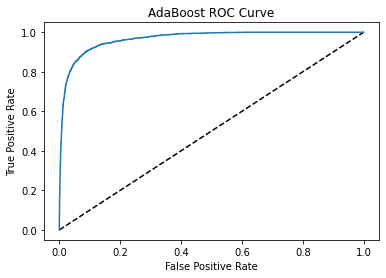

In [11]:
# para construir la roc curve, importaremos la libreria y luego utilizaremos la libreria para obtener 

from sklearn.metrics import roc_curve

y_pred_prob = adb_clf.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr, label='AdaBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AdaBoost ROC Curve')
plt.show();

In [12]:
# una metrica importante es el area debajo del a curva roc y para calcularla utilizaremos la libreria
from sklearn.metrics import roc_auc_score

y_pred_prob = adb_clf.predict_proba(X_val)[:,1]
print(f'El area debajo de la curva ROC es: {roc_auc_score(y_val, y_pred_prob):.3f}')

El area debajo de la curva ROC es: 0.967


## XGradient Boosting Classifier


In [13]:
import xgboost as xgb

In [14]:
xg_cl = xgb.XGBClassifier(objective='binary:logistic',
                          learning_rate=1,
                          reg_lambda=100,
                          min_split_loss=2,
                          subsample=0.6,
                          colsample_bytree=0.5,
                          n_estimators=100,
                          seed=123)

xg_cl.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=1, max_delta_step=0, max_depth=3,
              min_child_weight=1, min_split_loss=2, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=100, scale_pos_weight=1, seed=123, silent=None,
              subsample=0.6, verbosity=1)

In [15]:
# Verifiquemos el accuracy del modelo para el train y val set

y_train_pred = xg_cl.predict(X_train)
y_val_pred = xg_cl.predict(X_val)

print(f'Accuracy train: {accuracy_score(y_train, y_train_pred)}')
print(f'Accuracy val: {accuracy_score(y_val, y_val_pred)}')

Accuracy train: 0.9466702304251189
Accuracy val: 0.9474454197614225


In [16]:
# Cuanto usen un atributo particular los arboles, nos dan una magnitud de que tan importante es dicha variable para reducir impureza
# para verificar la importancia de los atributos existe un metodo llamado feature_imporances_
# veamoslo en la practica

rf_imp = pd.Series(xg_cl.feature_importances_, index=X.columns)

rf_imp.sort_values(ascending=False)

Cultivo_Daño_lag1                  0.198231
Suelo_Tipo                         0.197230
Pesticide_Use_Categoria_lag1       0.083470
Numero_Dosis_Semana_lag1           0.062300
Numero_Dosis_Semana                0.058251
Suelo_Tipo_Daño_lag1               0.042253
Numero_Dosis_Semana_lag2           0.031729
Pesticide_Use_Categoria            0.031590
Suelo_Tipo_lag1                    0.029824
Pesticide_Use_Categoria_lag2       0.029079
Cultivo_Tipo                       0.025421
Numero_Semanas_Usado_lag1          0.024495
Cultivo_Daño_lag2                  0.023854
Numero_Semanas_Usado               0.021978
Cantidad_estimada_insectos_lag2    0.014589
Numero_Semanas_Dejado              0.014349
Cultivo_Tipo_Daño_lag1             0.013064
Numero_Semanas_Dejado_lag2         0.012796
Numero_Semanas_Dejado_lag1         0.011065
Suelo_Tipo_Daño_lag2               0.009141
Suelo_Tipo_lag2                    0.008381
Cantidad_estimada_insectos_lag1    0.008368
Cantidad_estimada_insectos      

## Prediccion cambiando la cantidad de arboles

In [17]:
# Vamos a probar con diferentes tamanos de arboles
# Para ello vamos a utilizar la funcion np.arange.

n_estimators = np.arange(100, 1601, 250)
n_estimators

array([ 100,  350,  600,  850, 1100, 1350, 1600])

In [18]:
# Creamos un diccionario para almacenar el accuracy en funcion a la cantidad de arboles

acc_gb = {'n_estimators': [], 'acc_val': [], 'acc_train': []}

In [19]:
for n in n_estimators:
  print(f'Entrenando el modelo con {n} arboles')
  model = xgb.XGBClassifier(objective='binary:logistic',
                          learning_rate=1,
                          n_estimators=n,
                          seed=123)
  

  model.fit(X_train, y_train)
  acc_gb['n_estimators'].append(n)
  acc_gb['acc_train'].append(accuracy_score(y_train, model.predict(X_train)))
  acc_gb['acc_val'].append(accuracy_score(y_val, model.predict(X_val)))

Entrenando el modelo con 100 arboles
Entrenando el modelo con 350 arboles
Entrenando el modelo con 600 arboles
Entrenando el modelo con 850 arboles
Entrenando el modelo con 1100 arboles
Entrenando el modelo con 1350 arboles
Entrenando el modelo con 1600 arboles


In [20]:
pd.DataFrame(acc_gb)

,n_estimators,acc_val,acc_train
0,100,0.966464,0.970641
1,350,0.971922,0.982908
2,600,0.971134,0.988830
3,850,0.969446,0.992741
4,1100,0.969278,0.995611
5,1350,0.969334,0.997609
6,1600,0.968884,0.998804


## Prediccion cambiando la cantidad de atributos

In [21]:
# Armar arreglo para probar con el pametro colsample_bytree entre 0.1 y 0.9


In [ ]:
# Creamos un diccionario para almacenar el accuracy en funcion a la cantidad de arboles



In [ ]:
# Armar bucle para almacenar los datos en el df



Entrenando el modelo con 0.1 atributos
Entrenando el modelo con 0.30000000000000004 atributos
Entrenando el modelo con 0.5000000000000001 atributos
Entrenando el modelo con 0.7000000000000001 atributos
Entrenando el modelo con 0.9000000000000001 atributos


In [ ]:
pd.DataFrame(acc_atri)

,%_atri,acc_val,acc_train
0,0.1,0.952566,0.956757
1,0.3,0.967871,0.972048
2,0.5,0.970234,0.976071
3,0.7,0.972147,0.976817
4,0.9,0.973047,0.977506


## Prediccion cambiando el max_depth

In [ ]:
# Armar arreglo para probar con el pametro max_depth entre 1 y 7



array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Creamos un diccionario para almacenar el accuracy en funcion a la cantidad de arboles



In [ ]:
# Armar el bucle for



In [ ]:
pd.DataFrame(acc_md)

,Max_depth,acc_val,acc_train
0,1,0.905188,0.900782
1,2,0.960950,0.960864
2,3,0.970234,0.976071
3,4,0.974454,0.985299
4,5,0.973104,0.994092
5,6,0.972597,0.999423
6,7,0.971022,1.000000
7,8,0.970347,1.000000
8,9,0.970572,1.000000


# Actividades propuestas

1- Armar 3 bucles for para testear diferentes hiperparametros en AdaBoosting


2- Buscar la mejor combinacion de hiperparametros que maximice la precision.

3- Probar con el mismo ejemplo de properatti un random forest regressor